   AtomicNumber Symbol       Name AtomicMass  Group  Period  \
0             1      H   Hydrogen      1.008      1       1   
1             2     He     Helium     4.0026     18       1   
2             3     Li    Lithium       6.94      1       2   
3             4     Be  Beryllium     9.0122      2       2   
4             5      B      Boron      10.81     13       2   

                Category symbols  Total Sorbate Count  
0     Reactive Nonmetals       H                 8176  
1            Noble Gases      He                    0  
2          Alkali Metals      Li                    0  
3  Alkaline Earth Metals      Be                    0  
4             Metalloids       B                    0  
Group                  0
Period                 0
Symbol                 0
Total Sorbate Count    0
dtype: int64
Max sorbate count: 11296, Min sorbate count: 0


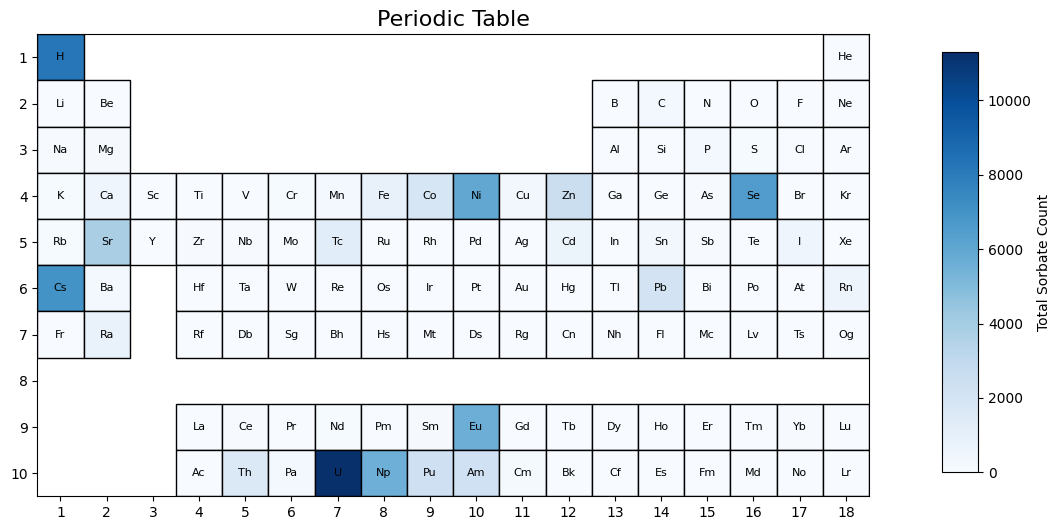

In [7]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import builtins  # Import builtins to explicitly use built-in functions

# Load the primary and secondary datasets
data = pd.read_csv('periodic_table.txt')
mav_data = pd.read_csv('Maverik_Compiled_Dataset.csv', nrows=118)

# Merge datasets based on the 'Symbol' column
data = data.merge(mav_data[['symbols', 'Total Sorbate Count']], 
                  left_on='Symbol', right_on='symbols', how='left')

# Fill missing group data and check for inconsistencies
data['Group'] = data['Group'].fillna(0).astype(int)

# Debug: Check the merged dataset
print(data.head())
print(data[['Group', 'Period', 'Symbol', 'Total Sorbate Count']].isna().sum())

# Function to display element information
def show_info(event):
    for rect, element in element_mapping.items():
        if rect.contains(event)[0]:  # Check if the click is on a rectangle
            info = data.loc[data['Symbol'] == element]
            if not info.empty:
                info_text = (f"Name: {info['Name'].values[0]}\n"
                             f"Atomic Number: {info['AtomicNumber'].values[0]}\n"
                             f"Atomic Mass: {info['AtomicMass'].values[0]}\n"
                             f"Group: {info['Group'].values[0]}\n"
                             f"Period: {info['Period'].values[0]}")
            else:
                info_text = "No data available for this element."
            info_label.config(text=info_text)
            break

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set base colormap and normalizer
cmap = plt.cm.Blues  # Define the colormap
max_sorbate_count = data['Total Sorbate Count'].max()
min_sorbate_count = data['Total Sorbate Count'].min()
norm = Normalize(vmin=min_sorbate_count, vmax=max_sorbate_count)

# Debug: Print max and min values
print(f"Max sorbate count: {max_sorbate_count}, Min sorbate count: {min_sorbate_count}")

element_mapping = {}
for i, row in data.iterrows():
    # Handle missing sorbate count values
    sorbate_count = row['Total Sorbate Count']
    if pd.isna(sorbate_count):  # Default to minimum opacity for missing values
        sorbate_count = min_sorbate_count

    # Map the sorbate count to a color in the colormap
    rgba_color = cmap(norm(sorbate_count))  # Get color directly from colormap

    # Create rectangle with the color from colormap
    rect = plt.Rectangle(
        (row['Group'] - 0.5, row['Period'] - 0.5), 1, 1,
        edgecolor="black", facecolor=rgba_color
    )
    ax.add_patch(rect)  # Add rectangle to the plot
    ax.text(row['Group'], row['Period'], row['Symbol'], ha="center", va="center", fontsize=8)
    element_mapping[rect] = row['Symbol']  # Map rectangle to element symbol

# Set grid limits and labels
ax.set_xlim(0.5, 18.5)
ax.set_ylim(max(data['Period']) + 0.5, 0.5)  # Flip y-axis by setting limits manually
ax.set_xticks(range(1, 19))
ax.set_yticks(range(1, max(data['Period']) + 1))
ax.set_xticklabels(range(1, 19))
ax.set_yticklabels(range(1, max(data['Period']) + 1))

# Remove grid lines
ax.grid(False)
ax.set_aspect('equal')
ax.set_title("Periodic Table", fontsize=16)

# Add the color legend to the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # Position: [x, y, width, height]
sm = ScalarMappable(cmap=cmap, norm=norm)  # ScalarMappable for the legend
fig.colorbar(sm, cax=cbar_ax, orientation='vertical', label="Total Sorbate Count")

# Create the main window
root = tk.Tk()
root.title("Interactive Periodic Table")

# Embed the Matplotlib figure in Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(fill="both", expand=True)

# Bind click events to the Matplotlib canvas
canvas.mpl_connect("button_press_event", show_info)

# Create a label to display element information
info_label = tk.Label(root, text="", justify='left', anchor="w", bg="white", font=("Arial", 12), borderwidth=2, relief="solid")
info_label.pack(fill="x", padx=10, pady=10)

# Run the application
root.mainloop()